Lec 6.1 All Challenge Problems

Using the 1980 monthly SST netcdf file we used last time:

1. Take the annual mean and plot it with the correct lat and lon. Use a different colormap than the default. Add axes labels, a colorbar and title. In the title, include what the plotted variable is and the units.

2. Take seasonal averages: DJF, etc. Plot the four seasons in a 2x2 plot of subplots, label each plot and put on one colorbar for all the plots, ends extended, with a min value of 0 and a max of 30. Make a descriptive supertitle (suptitle) for all the plots. Would it be correct to label these plots Winter, etc?

3. Mask out regions outside of the tropics (google definition of tropics) and plot the annual mean again. Adjust the font size of your axes labels and title. Adjust the axis limits to be constrained to the data (i.e. no whitespace).

4. Mask out the tropics and plot again.

5. (Advanced) Find the grid cell closest to us. How big is this cell in square km and miles? Plot the seasonal cycle of SST. What are our local seasonal averages, according to this model? Annual Mean? Are they realistic? What data sources could you use to validate this?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr

In [3]:
data = xr.open_dataset('C:\\Users\\alvar\\Downloads\\CESM.003.SST.1980.nc')

# extract variables from the above netcdf file
lat = np.array(data.lat)
#lat
lon = np.array(data.lon)
# monthly sea surface temperature anamoly
sst = np.array(data.SST)

In [4]:
sst.shape

(12, 180, 360)

In [5]:
lat.shape

(180,)

In [6]:
lon.shape

(360,)

In [36]:
sst_mean = np.mean(sst, axis=0)
# This takes all 12 monthly temperatures and gets one integer value
sst_mean.shape


(180, 360)

Text(0.5, 1.0, '1980 Annual Mean SST ($^o$C)')

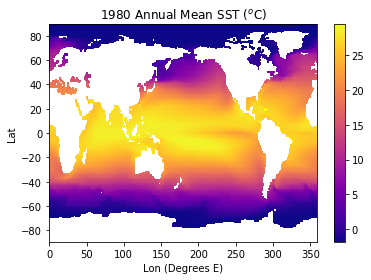

In [15]:
#Since this is 3 dimensional plotting we have to use p.colormesh(x, y, z, cmap='jet or whatever i like')
plt.pcolormesh(lon, lat, sst_mean, cmap='plasma')
plt.xlabel('Lon (Degrees E)')
plt.ylabel('Lat')
plt.colorbar()
plt.title('1980 Annual Mean SST ($^o$C)')

###2 Take seasonal averages: DJF, etc. Plot the four seasons in a 2x2 plot of subplots, label each plot and put on one colorbar for all the plots, ends extended, with a min value of 0 and a max of 30. Make a descriptive supertitle (suptitle) for all the plots. Would it be correct to label these plots Winter, etc?

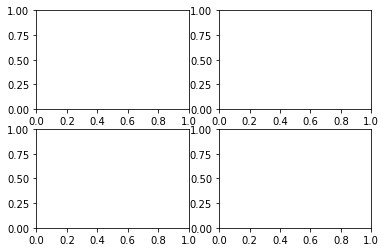

In [26]:
fig, myax = plt.subplots(2,2) # what we want but with actual data of 3 months

In [23]:
winter_mean = np.mean(sst[(0,1,11),:,:], axis = 0) # you can summon sst values through [(x)] indices
spring_mean = np.mean(sst[(2,3,4),:,:], axis = 0) # this is taking the mean of the 3 months summoned
summer_mean = np.mean(sst[(5,6,7),:,:], axis = 0)
fall_mean = np.mean(sst[(8,9,10),:,:], axis = 0)

In [24]:
fall_mean.shape

(180, 360)

Text(0.5, 0.98, '1980 Seasonal Sea Surface Temperature ($^o$C)')

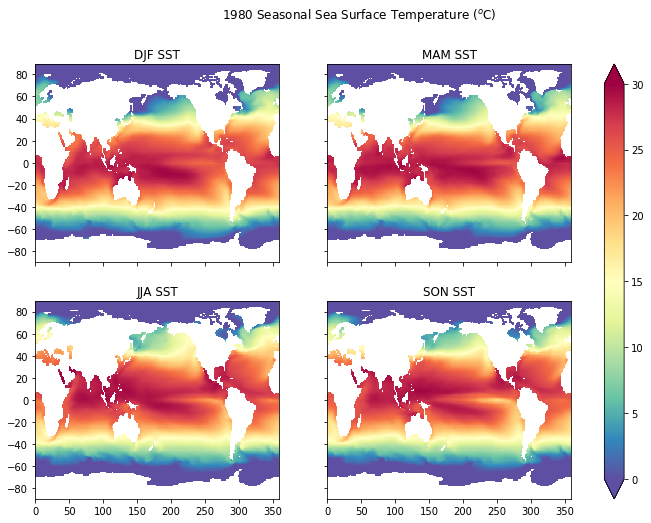

In [25]:
sstmin = 0
sstmax = 30
mycolor = 'Spectral_r' # setting some variables for easy plug and chug later on the subplots


fig, myax = plt.subplots(figsize=(12,8), nrows=2, ncols=2, sharex=True,sharey=True) 
#sets the figure for the subplots

im = myax[0,0].pcolormesh(lon,lat,winter_mean, vmin = sstmin, vmax = sstmax, cmap = mycolor)
myax[0,0].set_title('DJF SST')#winter subplot

im = myax[0,1].pcolormesh(lon,lat,spring_mean, vmin = sstmin, vmax = sstmax, cmap = mycolor)
myax[0,1].set_title('MAM SST')#spring subplot

im = myax[1,0].pcolormesh(lon,lat,summer_mean, vmin = sstmin, vmax = sstmax, cmap = mycolor)
myax[1,0].set_title('JJA SST')#summer subplot

im = myax[1,1].pcolormesh(lon,lat,fall_mean, vmin = sstmin, vmax = sstmax, cmap = mycolor)
myax[1,1].set_title('SON SST') #fall's subplot

fig.colorbar(im, ax = myax, extend = 'both')#extends the colorbar on both sides and makes only one for the fig

fig.suptitle('1980 Seasonal Sea Surface Temperature ($^o$C)')#sets a supertitle for all subplots

In [27]:
#how to mask out the tropics ...tropics = 23.4368

In [28]:
lat.shape

(180,)

In [29]:
lat

array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5,
       -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5,
       -71.5, -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5,
       -62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5, -54.5,
       -53.5, -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5,
       -44.5, -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5,
       -35.5, -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5,
       -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5,
       -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,
        -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,

In [30]:
# make a mask using the lat array

trop = 23.4368

(lat> trop) | (lat< (-1*trop)) #isolates -23.4368 to 23.4368

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [49]:
# the easiest way to do this is to make a mask array that is the same size as the mean sst array
mask = np.zeros_like(sst_mean) # LIFESAVER FUNCTION were gonna fill this bad boy up with values that are in the tropics only

In [34]:
mask.shape

(180, 360)

In [35]:
sst_mean.shape 

(180, 360)

In [50]:
for elements in range(360): #this stuff is for every single longitude range we want to check the latitude
    mask[:,elements] = (lat> trop) | (lat< (-1*trop)) # this fills empty array with values only in the tropics

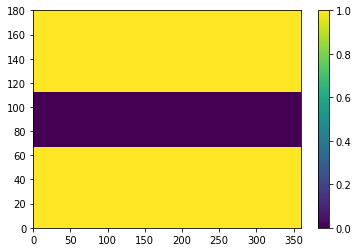

In [40]:
plt.pcolormesh(mask) #mean sst values contained for every geographic location making it 3 dimensional data
plt.colorbar()


In [51]:
mask

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [41]:
# take the mean SST and mask

sst_trop = np.ma.masked_where(mask,sst_mean) # this makes a new array with the masked conditions

In [42]:
np.ma.masked_where?

(-23.4368, 24.4368)

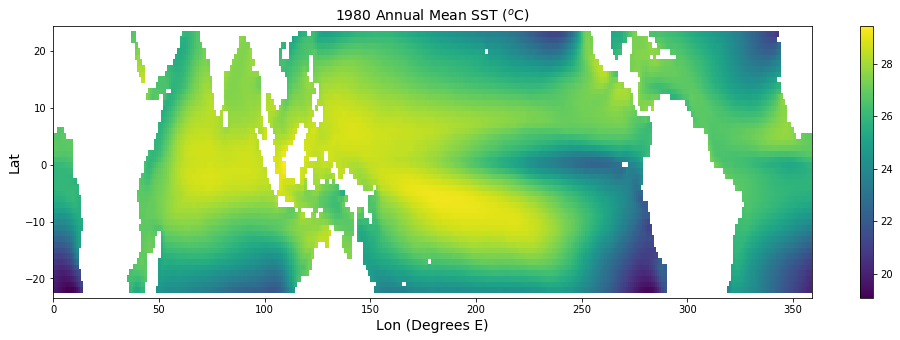

In [43]:
plt.figure(figsize=(17,5))
plt.pcolormesh(lon,lat,sst_trop) # this plots the new masked sst data, which is now only the tropics
plt.xlabel('Lon (Degrees E)', fontsize = 14)
plt.ylabel('Lat', fontsize = 14)
plt.colorbar()
plt.title('1980 Annual Mean SST ($^o$C)', fontsize = 14)
plt.ylim([-trop,trop+1])

In [44]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
# note this method changes tick mark font sizes as well

(-23.4368, 24.4368)

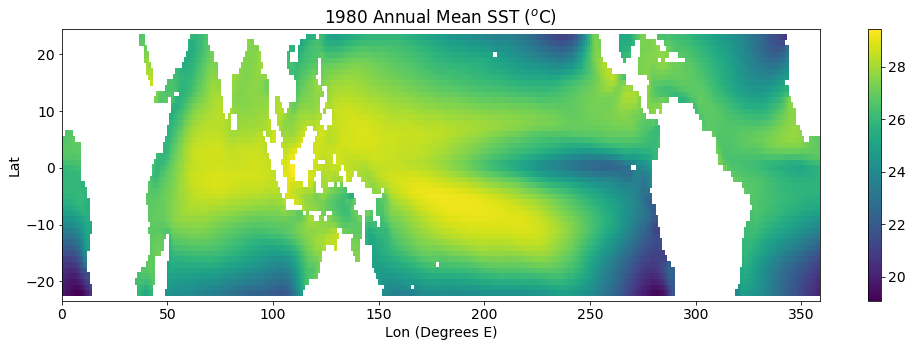

In [45]:
plt.figure(figsize=(17,5))
plt.pcolormesh(lon,lat,sst_trop)
plt.xlabel('Lon (Degrees E)')
plt.ylabel('Lat')
plt.colorbar()
plt.title('1980 Annual Mean SST ($^o$C)')
plt.ylim([-trop,trop+1])

In [52]:
mask2 = np.zeros_like (mask) # this is for selecting areas outside of the tropics only
for i in range(360):
    mask2[:,i] = (lat< trop) & (lat> (-1*trop)) # this one takes out the tropics

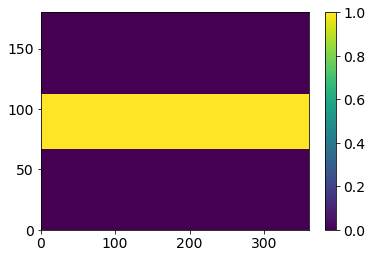

In [53]:
plt.pcolormesh(mask2)
plt.colorbar()

Text(0.5, 1.0, '1980 Annual Mean SST ($^o$C)')

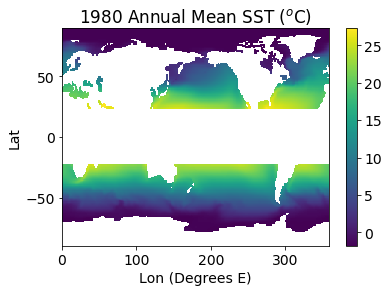

In [48]:
#plt.figure(figsize=(17,5))
plt.pcolormesh(lon,lat,np.ma.masked_where(mask2,sst_mean))
plt.xlabel('Lon (Degrees E)')
plt.ylabel('Lat')
plt.colorbar()
plt.title('1980 Annual Mean SST ($^o$C)')